### **Chapter 3: ANN**
- Ex1: Cars - Linear activation function
- Cho dữ liệu cars.csv
- Áp dụng ANN để dự đoán giá trị của một "potential car sale"

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [4]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [5]:
df = pd.read_csv("data/cars.csv", delimiter=",", header=None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       963 non-null    int64
 1   1       963 non-null    int64
 2   2       963 non-null    int64
 3   3       963 non-null    int64
 4   4       963 non-null    int64
 5   5       963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [7]:
df.head()

,0,1,2,3,4,5
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [8]:
df.describe()

,0,1,2,3,4,5
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,37.971963,0.512980,27.704050,14109.004154,6176.047767,11689.860852
std,12.290838,0.500091,13.378181,18273.702481,3260.670142,8986.896921
min,19.000000,0.000000,10.000000,0.000000,0.000000,500.000000
25%,27.000000,0.000000,20.000000,1475.000000,3506.500000,3554.000000
50%,37.000000,1.000000,25.000000,6236.000000,6360.000000,9130.000000
75%,49.000000,1.000000,32.000000,16686.000000,8649.500000,19245.000000
max,60.000000,1.000000,97.000000,59770.000000,11970.000000,29926.000000


In [9]:
# predict: [0:5]
# target: [5]

In [10]:
X=df.iloc[:,0:5]
y=df.iloc[:,5]

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
y = np.reshape(np.array(y), (-1,1))

In [12]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_scale = scaler_x.fit_transform(X)
y_scale = scaler_y.fit_transform(y)

In [13]:
# build model
model = Sequential()
model.add(Dense(3, input_dim=5, kernel_initializer='normal', activation='relu')) # 5 input, 3 = (5+1)/2
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 18        
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit model
history = model.fit(x_scale, y_scale, epochs=150,
                    batch_size=32,
                    verbose=0,
                    validation_split=0.2,
                    # use_multiprocessing = True,
)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


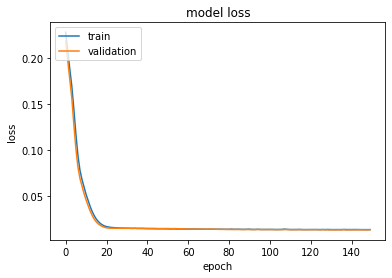

In [16]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_scale, y_scale)
print('loss, mse, mae:', results)


# Evaluate on test data
31/31 [==============================] - 0s 1ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0846
loss, mse, mae: [0.013551542535424232, 0.013551542535424232, 0.08457775413990021]


In [18]:
# Predictions
Xnew = np.array([[40, 0, 26, 9000, 8000]])
X_new = scaler_x.transform(Xnew)

ynew = model.predict(X_new)
y_new = scaler_y.inverse_transform(ynew)

print("X=%s, Predicted=%s" % (Xnew[0], y_new[0]))

X=[  40    0   26 9000 8000], Predicted=[12701.865]


In [19]:
ynew

array([[0.41466275]], dtype=float32)